# MAIA Overview

This tutorial would introduce you on the usage of MAIA, a toolbox designed for processing and analysis of MALDI-MSI data. 

The whole pipeline of MAIA is consisted of 3 parts as the following figure suggests:


<div>
<center>
<img src="figs/MAIA workflow.png" width="800">
</center>
</div>

MAIA package is consisted of 3 main modules, namely <code>peak_finding (pf)</code>, <code>molecular_matcher (mm)</code> and <code>normalizer (norm)</code>. In addition to that there are two other modules to help with loading the data in different stages and visualization, namely <code>utils (ut)</code> and <code>visualize (vis)</code>.

In [1]:
import MAIA
import warnings
warnings.filterwarnings("ignore")

## Step 1: Image Extraction using adaptive Peak Finder

***MAIA*** identifies more molecules than other freely-available software, imaging them automatically with higher quality.

To load the raw data you need to specify the path to the **IBD** and **imzml** files, which contain the raw output of MALDI mass spectrometer and the correspoding metadata.

In [2]:
path = '/data/SV_DAngelo/Leila/MALDI-MSI/MAIA_zebrafish/Atlases/Controls_timepoints/8hpf/'
section = '20230639_Zebrafish_ctrl_cl5_8hpf_section_9_167x182_Att35_5um'

smz = MAIA.utils.SmzMLobj(f'{path+section}/{section}.IBD',
                           f'{path+section}/{section}.imzml',
                           mz_resolution=10e-5)

smz.load(load_unique_mz=True)

Loading Spectra at resolution 0.0001: 100%|█████████████████████████████████████████████████| 30399/30399 [00:02<00:00, 12371.77it/s]
Loading the m/z values at resolution 0.0001: 30399it [00:01, 18247.95it/s]


In [3]:
smz.S

23340it [12:14, 31.77it/s]


KeyboardInterrupt: 

You can visualize the raw frequencies of mass-to-charge ratios as well:

In [ ]:
mz_resolution = 0.0001
threshold_count = 8.
approximate_interval =1.5
smoothing = 1. #2.5

mzrange_test = np.array([620.4,620.8])

PF = MAIA.vis.plot_freqmz(smz, 
                          mzrange_test, 
                          bins=True,
                          smoothing=smoothing, 
                          ylim=3000, 
                          threshold_count=threshold_count, 
                          approximate_interval=approximate_interval,
                          parallelize=True, 
                          mz_resolution=mz_resolution)

for m in PF.data_mz[PF.seeds]:
    plt.vlines(m, 0,1000,linestyle='--', color='r')

To identify the molecules you need to run the MAIA peak finder by specifiying the corresponding hyperparameters.

The output of the peak finder are the <code>images.h5ad</code> and <code>ranges.csv</code> files, which are then saved in the specified directory path.

In [3]:
MAIA.pf.run(directory_path=f'{path}{section}/CHECK/',
            smz=smz, 
            spectrum_range=(400,1200),
            threshold_count=threshold_count, 
            approximate_interval=approximate_interval,
            smoothing=smoothing,
            parallelize=True,
            saveimages=True)

NameError: name 'MAIA' is not defined

## Step 2: Molecule Matching

***MAIA*** retrieves identical molecules across acquistions without ambiguity.

## Step 3: Normalization

***MAIA*** normalizes images by fitting a Bayesian model that accounts for different sources of noise in a regularized way and allows a conservative non-linear rescaling of intensity values such that qualifications can be properly compared across sections.

In [2]:
# developmental timepoints 8/24/48/72
acquisitions = [
    # --------- fish 1: 8h --------- #
    # 'Atlas_8hpf1/20221014_Zebrafish_8hpf_fish1_section30_215x230_Att35_5um',
    # 'Atlas_8hpf1/20221013_Zebrafish_8hpf_fish1_section28_214x214_Att35_5um',
    # 'Atlas_8hpf1/20221010_Zebrafish_8hpf_fish1_section23_192x202_Att35_5um',
    '20221008_Zebrafish_8hpf_fish1_section18_194x170_Att35_5um',
    '20221002_Zebrafish_8hpf_fish1_section_16_192x190_Att35_5um',
    '20221002_Zebrafish_8hpf_fish1_section_14_154x148_Att35_5um',
    # 'Atlas_8hpf1/20221001_Zebrafish_8hpf_fish1_section_10_154x142_Att35_5um',
    
    # --------- fish 2: 8h --------- #
    #'Atlas_8hpf2/20221008_Zebrafish_8hpf_fish2_section9_130x134_Att35_5um',
    #'Atlas_8hpf2/20221003_Zebrafish_8hpf_fish2_section_7_140x122_Att35_5um',
    
    
    # --------- fish 1: 24h --------- #
    # 'Atlas_24h/20220408_Zebrafish_atlas_24h_fish1_section17_175x155_Att35_7um',
    # 'Atlas_24h/20220407_Zebrafish_atlas_24h_fish1_section30_167x134_Att35_7um',
    '20220407_Zebrafish_atlas_24h_fish1_section28_131x124_Att35_7um',
    '20220407_Zebrafish_atlas_24h_fish1_section26_141x140_Att35_7um',
    '20220406_Zebrafish_atlas_24h_fish1_section24_140x145_Att35_7um',
    # 'Atlas_24h/20220405_Zebrafish_atlas_24h_fish1_section20_157x142_Att35_7um',
    # 'Atlas_24h/20220406_Zebrafish_atlas_24h_fish1_section22_151x150_Att35_7um',
    # 'Atlas_24h/20220402_Zebrafish_atlas_24h_fish1_section16_228x154_Att35_7um',
    
    # --------- fish 2: 24h --------- #
    #'Atlas_24h/20220928_Zebrafish_atlas_24hpf_fish2_section26_256x126_Att35_7um',
    #'Atlas_24h/20220927_Zebrafish_atlas_24hpf_fish2_section18_284x125_Att35_7um',
    #'Atlas_24h/20220927_Zebrafish_atlas_24hpf_fish2_section10_141x128_Att35_7um',
    #'Atlas_24h/20220926_Zebrafish_atlas_24hpf_fish2_section2_131x124_Att35_7um',
    
    
    # --------- fish 1: 48h --------- #
    #'Atlas_48h/11022022_Zebrafish_atlas_section19_Att35_353x141_7um',
    #'Atlas_48h/20022022_Zebrafish_atlas_section23_313x107_Att35_7um',
    #'Atlas_48h/20022022_Zebrafish_atlas_section25_334x110_Att35_7um',
    
    # --------- fish 2: 48h --------- #
    '20220928_Zebrafish_atlas_48hpf_fish3_section18_332x133_Att35_7um',
    # 'Atlas_48hpf_fish2/20220330_Zebrafish_atlas_48h_fish2_section29_150x114_Att35_7um',
    '20220329_Zebrafish_atlas_48h_fish2_section24_377x145_Att35_7um',
    # 'Atlas_48hpf_fish2/20220328_Zebrafish_atlas_48h_fish2_section26_200x135_Att35_7um',
    # 'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section9_200x134_Att35_7um',
    # 'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section17_405x145_Att35_7um',
    # 'Atlas_48hpf_fish2/20220328_Zebrafish_atlas_48h_fish2_section14_323x144_Att35_7um',
    # 'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section13_305x127_Att35_7um',
    # 'Atlas_48hpf_fish2/20220314_Zebrafish_atlas_48h_fish2_section22_385x142_Att35_7um',
    
  
    # --------- fish 1: 72h --------- #
    #'Atlas_72h/20220529_Zebrafish_atlas_72h_fish1_section22_423x142_Att35_7um',
    #'Atlas_72h/20220529_Zebrafish_atlas_72h_fish1_section35_271x137_Att35_7um',
    #'Atlas_72h/20220604_Zebrafish_atlas_72h_section26_413x132_Att35_7um',
    #'Atlas_72h/20220604_Zebrafish_atlas_72h_section33_292x143_Att35_7um',
    #'Atlas_72h/20220614_Zebrafish_atlas_72h_section_31_343x124_Att35_7um',
    
    # --------- fish 2: 72h --------- #
    '20220620_Zebrafish_atlas_72hpf_fish2_section22_420x142_Att35_7um',
    '20220620_Zebrafish_atlas_72hpf_fish2_section26_345x136_Att35_7um',
    # 'Atlas_72h_fish2/20220621_Zebrafish_atlas_72hpf_fish2_section_20_481x136_Att35_7um',
    '20220621_Zebrafish_atlas_72hpf_fish2_section24_422x135_Att35_7um',
    # 'Atlas_72h_fish2/20220701_Zebrafish_atlas_72hpf_fish2_section_14_407x132_Att35_7um',
    # 'Atlas_72h_fish2/20220701_Zebrafish_atlas_72hpf_fish2_section_16_420x124_Att35_7um',
    # 'Atlas_72h_fish2/20220702_Zebrafish_atlas_72hpf_fish2_section_32_170x108_Att35_7um',
    
]

In [3]:
NAME_FOLDER = '07082023_alltimepoints_selectsections'
PATH_DATA = f'/data/SV_DAngelo/Hannah/processedData/zebrafish/mutiple_timepoints/{NAME_FOLDER}'
PATH_MASKS = '/data/SV_DAngelo/Hannah/zebrafish_masks'

In [4]:
x, masks = MAIA.utils.tools.read_images_masks(acquisitions,
                                        path_images=PATH_DATA, path_masks=PATH_MASKS,
                                        gaussian_smoothing=True, gaussian_sigma=0.3,
                                        log_transform=True, epsilon=0.0002
                                       )

Loading Data...: 554it [02:32,  3.63it/s]

Data Loaded Successfully.


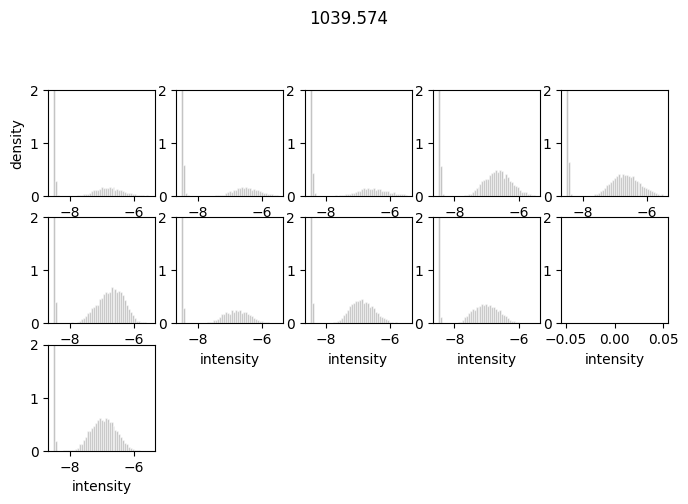

In [8]:
MAIA.vis.plot_intensity(x, masks, v=1, mz_val=1039.574)

We can model the MALDI-MSI data intensities’ histogram as a gaussian mixture model and approximate the true foreground distribution, where the non-biological batch effects have been taken into account. To normalize the data, MAIA uses the following graphical model to address the batch effects.

<div>
<center>
<img src="figs/MAIA_PGM.png" width="800">
</center>
</div>

To initialize the SVI, we simply fit a GMM on the cumulative distribution of each molecule. We use BIC metric to choose whether a unimodal or bimodal gaussian distribution would fit the best on the intensities. It's also possible to intialize the required parameters manually and save them in a dictionary to pass for the normalization method.

In [10]:
init_state = MAIA.norm.initialize(x, masks, visualize=False, subsample=True)

GMM Initialization: 100%|██████████| 554/554 [00:19<00:00, 28.30it/s]
2023-09-11 17:59:42.636605: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.2.128). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [15]:
svi_result = MAIA.norm.normalize(x, 
                              masks,
                              init_state=init_state,
                              subsample=True,
                              optimizer=None,
                              num_steps=5000,
                              seed=42)

100%|██████████| 5000/5000 [00:07<00:00, 666.19it/s, init loss: 17003964.0000, avg. loss [4751-5000]: -936195.5000]


After normalization, you can save the parameters of interest using the utils module for further analysis.

In [16]:
SAVE_PATH = f'/home/alireza/parameters/{NAME_FOLDER}'
MAIA.ut.tools.save_svi(svi_result, SAVE_PATH)

numpyro.infer.svi.SVIRunResult

Afterwards, you can transform your data to get the MAIA normalized MALDI-MSI data and preform future downstream analysis.

In [ ]:
x_tran = MAIA.norm.transform(x, mask, svi_result)